In [655]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sb
import random

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import MinMaxScaler, StandardScaler

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [656]:
train = pd.read_csv('D:\\relaytrain_2_2_2_2_2_2_2_2_2_2_2_2.csv')
test = pd.read_csv('D:\\relaytest_2_2_2_2_2_2_2_2_2_2_2_2.csv')

### Null Evaluation

In [657]:
with pd.option_context('display.max_rows', 150):
     print(train.isnull().sum().sort_values(ascending = False))

with pd.option_context('display.max_rows', 150):
     print(test.isnull().sum().sort_values(ascending = False))

lastorder     17
firstorder    17
created       17
custid        17
city           0
favday         0
train          0
doorstep       0
refill         0
paperless      0
ordfreq        0
avgorder       0
eclickrate     0
eopenrate      0
esent          0
retained       0
dtype: int64
lastorder     3
firstorder    3
created       3
custid        3
city          0
favday        0
train         0
doorstep      0
refill        0
paperless     0
ordfreq       0
avgorder      0
eclickrate    0
eopenrate     0
esent         0
retained      0
dtype: int64


### Drop Lines With Nulls

In [658]:
train = train.dropna()
test = test.dropna()

### Separate the Labels

In [659]:
labeltrain = train.loc[:,'retained']
labeltest = test.loc[:,'retained']

train = train.drop(columns = 'retained')
test = test.drop(columns = 'retained')

### Creation of Dummy Variable 'weekend' (for question 4)

In [660]:
weekendtrain = []
for each in train.loc[:,'favday']:
    if each in ['Friday','Saturday','Sunday']:
        weekendtrain.append(1)
    else:
        weekendtrain.append(0)

train = pd.concat([train, pd.DataFrame(weekendtrain, columns = ['weekend'], index = train.index)], axis = 1)


weekendtest = []
for each in test.loc[:,'favday']:
    if each in ['Friday','Saturday','Sunday']:
        weekendtest.append(1)
    else:
        weekendtest.append(0)
        
test = pd.concat([test, pd.DataFrame(weekendtest, columns = ['weekend'],index = test.index)], axis = 1)

### Print Number of Each Class in Both Test and Train Datasets

In [661]:
trainlabel0 = 0
trainlabel1 = 0
for each in labeltrain:
    if each == 0:
        trainlabel0 += 1
    elif each == 1:
        trainlabel1 += 1

print('Train 0:', trainlabel0, 'Train 1:', trainlabel1)
        
testlabel0 = 0
testlabel1 = 0
for each in labeltest:
    if each == 0:
        testlabel0 += 1
    elif each == 1:
        testlabel1 += 1

print('Test 0:', testlabel0, 'Test 1:', testlabel1)

Train 0: 5037 Train 1: 19525
Test 0: 1286 Test 1: 4933


### Artificially Balance Both Datasets (optional, downsampling is randomized)

In [662]:

labels = np.array(labeltrain)

defaultindex = []
for ind,each in enumerate(labels):
    if each == 0:
        defaultindex.append(ind)

selectionpool = defaultindex + list(random.sample(list(set(range(0,len(labels))) - set(defaultindex)), len(defaultindex)))

labeltrain = labels[selectionpool]
train = train.iloc[selectionpool,:]


labels = np.array(labeltest)

defaultindex = []
for ind,each in enumerate(labels):
    if each == 0:
        defaultindex.append(ind)

selectionpool = defaultindex + list(random.sample(list(set(range(0,len(labels))) - set(defaultindex)), len(defaultindex)))

labeltest = labels[selectionpool]
test = test.iloc[selectionpool,:]


### Normalize Features (optional)

In [663]:

# scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(train.loc[:,['esent', 'eclickrate', 'avgorder', 'ordfreq', 'paperless', 'refill','doorstep', 'weekend']])  # .append(test.loc[:,['esent', 'eclickrate', 'avgorder', 'ordfreq', 'paperless', 'refill','doorstep', 'weekend']], ignore_index = True)
tr = scaler.transform(train.loc[:,['esent', 'eclickrate', 'avgorder', 'ordfreq', 'paperless', 'refill','doorstep', 'weekend']])
ts = scaler.transform(test.loc[:,['esent', 'eclickrate', 'avgorder', 'ordfreq', 'paperless', 'refill','doorstep', 'weekend']])

train = pd.DataFrame(tr, columns = train.loc[:,['esent', 'eclickrate', 'avgorder', 'ordfreq', 'paperless', 'refill','doorstep', 'weekend']].columns)
test = pd.DataFrame(ts, columns = test.loc[:,['esent', 'eclickrate', 'avgorder', 'ordfreq', 'paperless', 'refill','doorstep', 'weekend']].columns)


In [664]:
train

,esent,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,weekend
0,0.235772,0.034483,0.009677,0.000000,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.022380,0.018433,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.036630,0.000000,0.0,0.0,0.0,0.0
3,0.130081,0.000000,0.039489,0.039801,1.0,1.0,0.0,0.0
4,0.105691,0.153846,0.104331,0.036650,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
10069,0.365854,0.066667,0.026673,0.000000,1.0,1.0,0.0,1.0
10070,0.260163,0.031250,0.024420,0.034188,1.0,0.0,0.0,0.0
10071,0.349593,0.000000,0.041902,0.051282,1.0,0.0,0.0,0.0
10072,0.056911,0.285714,0.026673,0.000000,1.0,0.0,0.0,0.0


### Question 1

Test Accuracy #1: 0.9008553654743391
Coefficients #1: {'esent': 19.337318647983697, 'eclickrate': 1.4641718752915975, 'avgorder': -2.37947140485871, 'ordfreq': -0.9112913649951652, 'paperless': 0.4722783429660614, 'refill': 0.5981144931185078, 'doorstep': 0.4707551348915645}


Text(0.5, 1, 'Test Dataset Confusion Matrix')

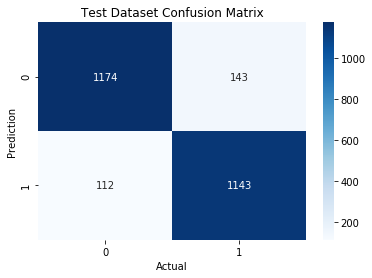

In [665]:
selection1 = ['esent', 'eclickrate', 'avgorder', 'ordfreq', 'paperless', 'refill', 'doorstep']
LRmodel1 = LogisticRegression()
LRmodel1.fit(train.loc[:,selection1],labeltrain)
print('Test Accuracy #1: ' + str(LRmodel1.score(test.loc[:,selection1],labeltest)))

coef1 = {}
for ind,each in enumerate(selection1):
    coef1[each] = LRmodel1.coef_[0][ind]
print('Coefficients #1: ' + str(coef1))

preds = LRmodel1.predict(test.loc[:,selection1])
cf = pd.crosstab(preds, labeltest)
sb.heatmap(cf, annot = True, cmap = "Blues", fmt='g')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Test Dataset Confusion Matrix')

### Question 2

Test Accuracy #2: 0.6108087091757387
Coefficients #2: {'avgorder': 1.3020131516307225, 'ordfreq': 0.2580951304964665, 'paperless': 0.7604728491973656, 'refill': 0.813396710371087, 'doorstep': 0.8221104209344571}


Text(0.5, 1, 'Test Dataset Confusion Matrix')

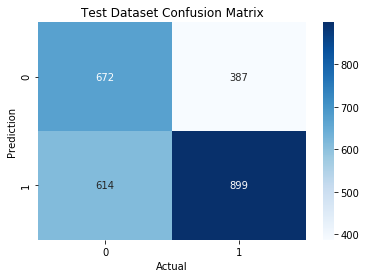

In [666]:
selection2 = ['avgorder', 'ordfreq', 'paperless', 'refill', 'doorstep']

LRmodel2 = LogisticRegression()
LRmodel2.fit(train.loc[:,selection2],labeltrain)
print('Test Accuracy #2: ' + str(LRmodel2.score(test.loc[:,selection2],labeltest)))

coef2 = {}
for ind,each in enumerate(selection2):
    coef2[each] = LRmodel2.coef_[0][ind]
print('Coefficients #2: ' + str(coef2))

preds = LRmodel2.predict(test.loc[:,selection2])
cf = pd.crosstab(preds, labeltest)
sb.heatmap(cf, annot = True, cmap = "Blues", fmt='g')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Test Dataset Confusion Matrix')

### Question 3

Test Accuracy #3: 0.8996889580093312
Coefficients #3: {'esent': 19.514329344225853}


Text(0.5, 1, 'Test Dataset Confusion Matrix')

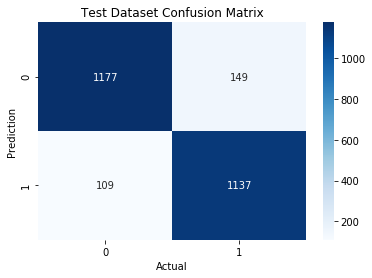

In [667]:
selection3 = ['esent']

LRmodel3 = LogisticRegression()
LRmodel3.fit(train.loc[:,selection3],labeltrain)
print('Test Accuracy #3: ' + str(LRmodel3.score(test.loc[:,selection3],labeltest)))

coef3 = {}
for ind,each in enumerate(selection3):
    coef3[each] = LRmodel3.coef_[0][ind]
print('Coefficients #3: ' + str(coef3))

preds = LRmodel3.predict(test.loc[:,selection3])
cf = pd.crosstab(preds, labeltest)
sb.heatmap(cf, annot = True, cmap = "Blues", fmt='g')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Test Dataset Confusion Matrix')

### Question 4

Test Accuracy #4: 0.9004665629860031
Coefficients #4: {'esent': 19.35526656319697, 'eclickrate': 1.4726807653541245, 'avgorder': -2.356679744784569, 'ordfreq': -0.920491254460746, 'paperless': 0.47302092241790916, 'refill': 0.6000717751933278, 'doorstep': 0.4636059084131296, 'weekend': 0.15618924491832217}


Text(0.5, 1, 'Test Dataset Confusion Matrix')

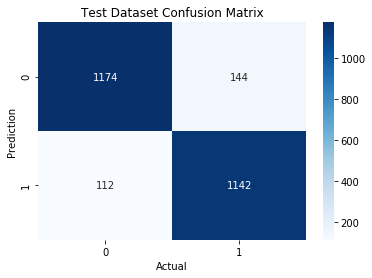

In [668]:
selection4 = ['esent', 'eclickrate', 'avgorder', 'ordfreq', 'paperless', 'refill','doorstep', 'weekend']

LRmodel4 = LogisticRegression()
LRmodel4.fit(train.loc[:,selection4],labeltrain)
print('Test Accuracy #4: ' + str(LRmodel4.score(test.loc[:,selection4],labeltest)))

coef4 = {}
for ind,each in enumerate(selection4):
    coef4[each] = LRmodel4.coef_[0][ind]
print('Coefficients #4: ' + str(coef4))

preds = LRmodel4.predict(test.loc[:,selection4])
cf = pd.crosstab(preds, labeltest)
sb.heatmap(cf, annot = True, cmap = "Blues", fmt='g')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Test Dataset Confusion Matrix')

### Begin RandomForest Model

In [669]:
from sklearn.ensemble import RandomForestClassifier

In [670]:
selection5 = ['esent', 'eclickrate', 'ordfreq', 'paperless', 'refill']

0.916796267496112


Text(33.0, 0.5, 'Prediction')

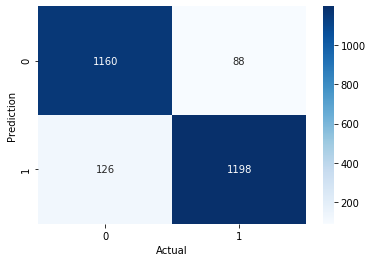

In [671]:
RFmodel = RandomForestClassifier(n_estimators = 100)
RFmodel.fit(train.loc[:,selection5], labeltrain)
preds = RFmodel.predict(test.loc[:,selection5])

cf = pd.crosstab(preds, labeltest)

print(RFmodel.score(test.loc[:,selection5],labeltest))

sb.heatmap(cf, annot = True, cmap = "Blues", fmt='g')
plt.xlabel('Actual')
plt.ylabel('Prediction')

### Begin XGBoost Model

In [672]:
from xgboost import XGBClassifier
import xgboost as xgb

0.9210730948678072


Text(33.0, 0.5, 'Prediction')

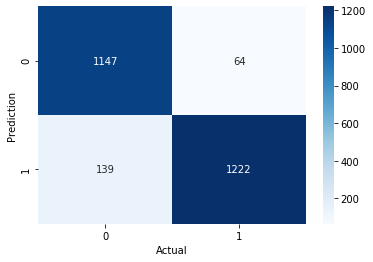

In [673]:
XGBmodel = XGBClassifier() 
XGBmodel.fit(train.loc[:,selection5], labeltrain)
preds = XGBmodel.predict(test.loc[:,selection5])

print(XGBmodel.score(test.loc[:,selection5],labeltest))

cf = pd.crosstab(preds, labeltest)

sb.heatmap(cf, annot = True, cmap = "Blues", fmt='g')
plt.xlabel('Actual')
plt.ylabel('Prediction')

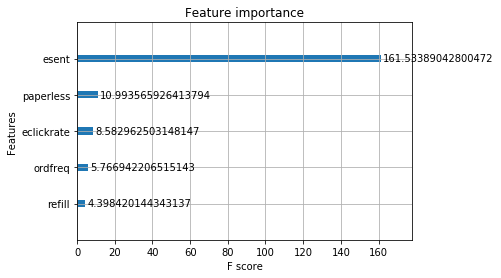

In [674]:
xgb.plot_importance(XGBmodel, importance_type = 'gain')

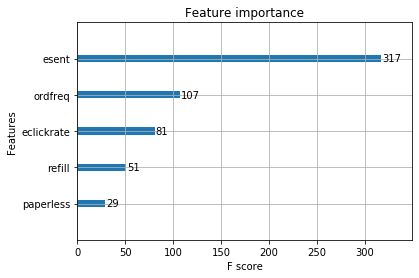

In [675]:
xgb.plot_importance(XGBmodel, importance_type = 'weight')